In [45]:
import pandas as pd
import os

def get_avg_depth_beam():
    # Initialize a list to store the data
    data = []
    
    # Get a list of all files in the current directory
    files = [f for f in os.listdir('.') if f.endswith('.csv')]
    
    # Loop through each file
    for file in files:
        # Load the CSV file into a dataframe
        df = pd.read_csv(file)
        
        # Calculate the average depth and beam
        avg_depth = df['depth'].mean()
        avg_beam =  int(df['beam'].mean())
        
        # Append the results to the data list
        data.append({'filename': file, 'average_depth': avg_depth, 'average_beam': avg_beam})
    
    # Convert the list to a DataFrame
    results_df = pd.DataFrame(data)
    
    # Sort the DataFrame by the 'average_beam' column
    results_df_sorted = results_df.sort_values(by='average_beam', ascending=True)
    
    # Return the sorted DataFrame
    return results_df_sorted


In [46]:
# Now you can call the function and store the result
df = get_avg_depth_beam()
print(df)

                          filename  average_depth  average_beam
61  sabre_v0_20_look_beam_0001.csv          232.8             1
66  sabre_v0_20_look_beam_0002.csv          228.0             2
64  sabre_v0_20_look_beam_0003.csv          228.0             3
82  sabre_v0_20_look_beam_0004.csv          242.2             4
75  sabre_v0_20_look_beam_0005.csv          232.8             5
..                             ...            ...           ...
96  sabre_v0_20_look_beam_5120.csv          195.6          5120
89  sabre_v0_20_look_beam_5440.csv          195.6          5440
41  sabre_v0_20_look_beam_5760.csv          195.6          5760
43  sabre_v0_20_look_beam_6080.csv          195.6          6080
93  sabre_v0_20_look_beam_6400.csv          195.6          6400

[100 rows x 3 columns]


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_avg_depth_beam(df, x_label, y_label, title, rp, baseline_values=None):
    baseline_names = ['Sabre', 'Sabre Extended', 'Sabre Depth']

    # Set the style of the visualization
    sns.set(style="whitegrid")
    
    # Create the scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='average_beam', y='average_depth', data=df, label=rp)
    
    # Add baselines if provided
    if baseline_values:
        colors = ['r', 'g', 'b']  # Colors for the baselines
        for i, value in enumerate(baseline_values):
            if i < len(colors):  # To ensure we have predefined colors
                # Add a horizontal line at the baseline value
                plt.axhline(y=value, color=colors[i], linestyle='--', label=baseline_names[i])
    
    # Customize the plot with the provided labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Add a legend if there are baselines
    if baseline_values:
        plt.legend()

    
    # Show the plot
    plt.show()



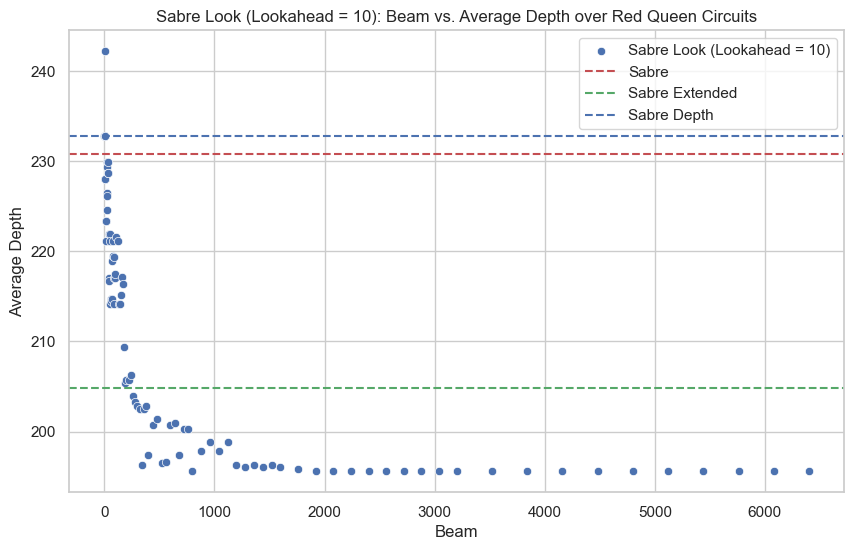

In [48]:
# Assuming `df_sorted` is the dataframe you have from the previous function
baseline_values = [230.8, 204.8, 232.8]  # Example baselines
x_label = 'Beam'
y_label = 'Average Depth'
rp = 'Sabre Look (Lookahead = 10)'
title = f'{rp}: Beam vs. Average Depth over Red Queen Circuits'
plot_avg_depth_beam(df, x_label=x_label, y_label=y_label, title=title, rp=rp, baseline_values=baseline_values)
